In [17]:
pip install tensorflow keras opencv-python matplotlib tensorflow-hub notebook


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 

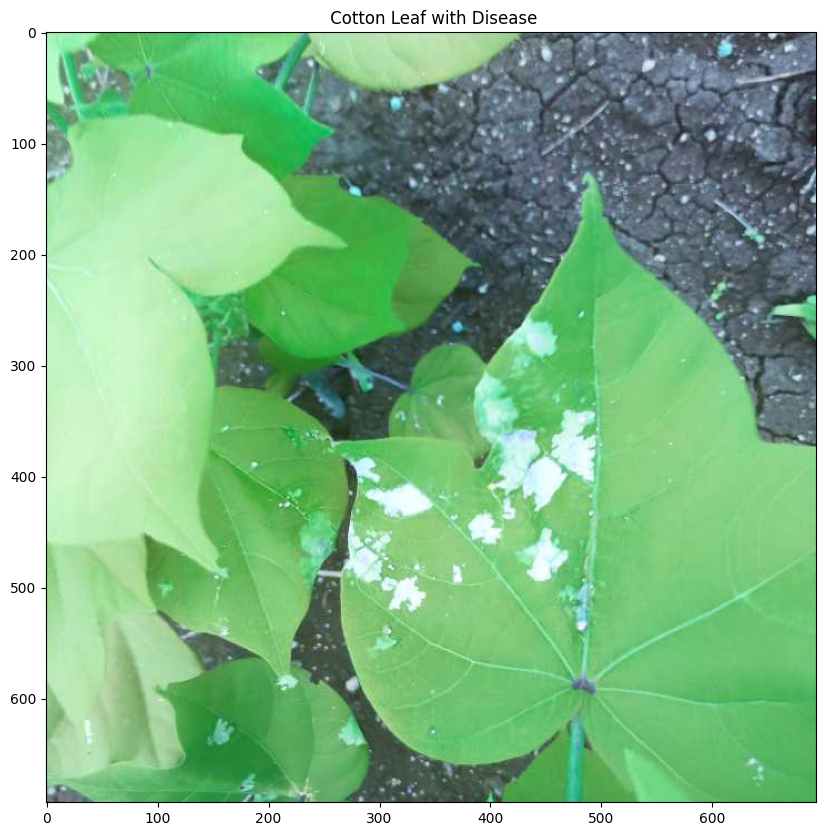

In [21]:

image = cv2.imread('/home/rohit/SIH/SIH-website/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

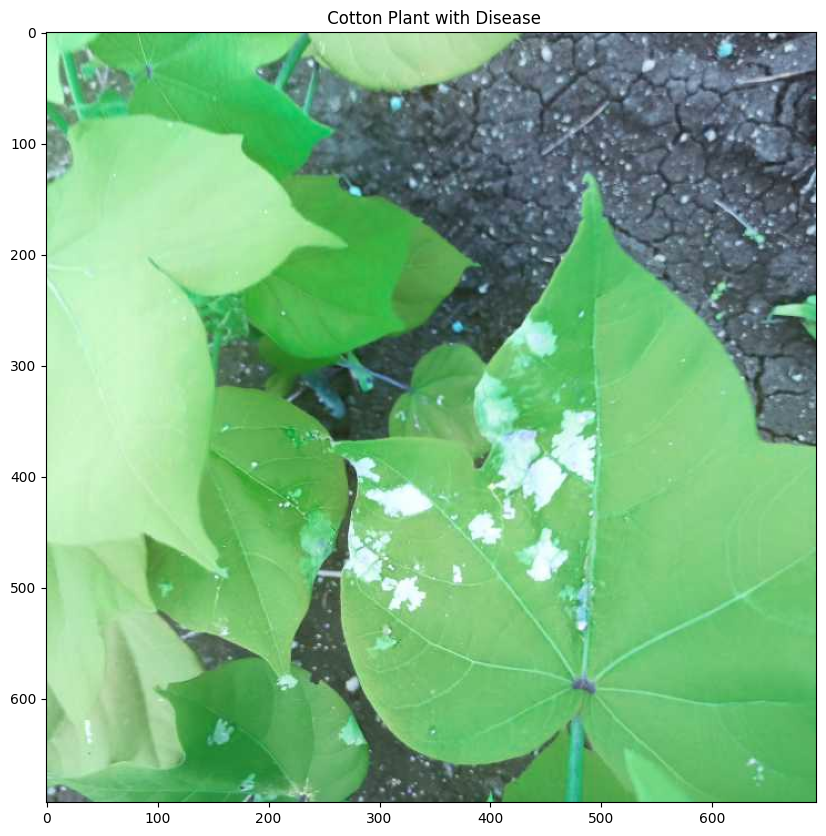

In [20]:
image = cv2.imread('/home/rohit/SIH/SIH-website/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Plant with Disease')
plt.imshow(image)

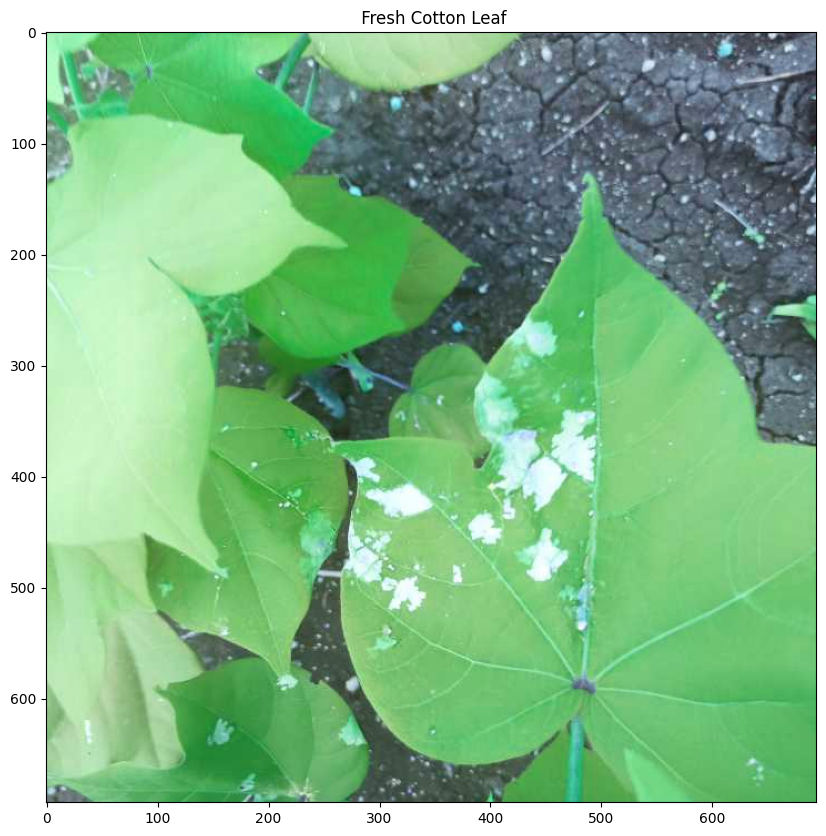

In [22]:
image = cv2.imread('/home/rohit/SIH/SIH-website/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)

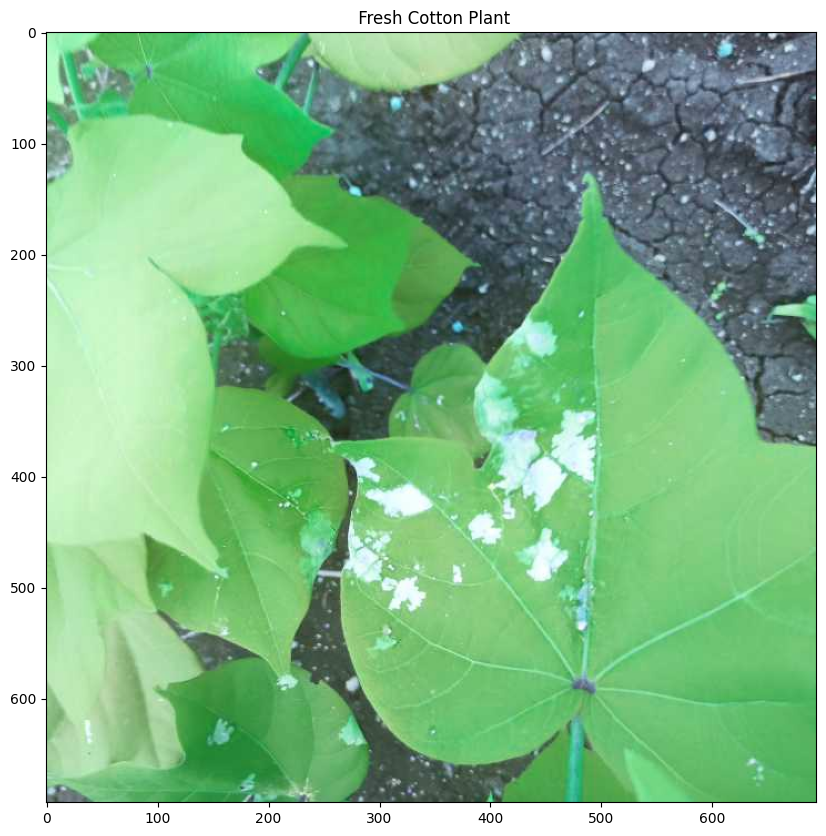

In [23]:
image = cv2.imread('/home/rohit/SIH/SIH-website/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [24]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [25]:
train_data = train_datagenerator.flow_from_directory('/home/rohit/SIH/SIH-website/Cotton Disease/train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_data = test_datagenerator.flow_from_directory('/home/rohit/SIH/SIH-website/Cotton Disease/val',
                                                  target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [26]:
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential , layers

In [27]:
base_layer = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
)

model = Sequential([
    base_layer,
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.45),
    layers.BatchNormalization(),
    layers.Dense(2048,activation="relu"),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.35),
    layers.BatchNormalization(),
    layers.Dense(1,activation="sigmoid")
])

I0000 00:00:1725095120.418561    9261 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-31 14:35:20.419957: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


2024-08-31 14:35:39.715713: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-08-31 14:35:39.747576: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-08-31 14:35:39.785058: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


In [28]:
from tensorflow.keras import optimizers
model.compile(
    optimizer = optimizers.Adam(learning_rate=0.00075),
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
)

In [29]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 1, verbose = 1, factor = 0.25, mode="min")

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(
    train_data,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_data=test_data,
    callbacks = [reduce_lr]
)

Epoch 1/10


2024-08-31 14:36:14.769687: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
/home/rohit/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-31 14:36:28.200031: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


61/61 ━━━━━━━━━━━━━━━━━━━━ 577s 9s/step - accuracy: 0.3089 - loss: -1.8437 - val_accuracy: 0.1700 - val_loss: 314177.0625 - learning_rate: 0.0010
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 536s 9s/step - accuracy: 0.4202 - loss: -15.7594 - val_accuracy: 0.1700 - val_loss: 55000.7109 - learning_rate: 0.0010
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 494s 8s/step - accuracy: 0.3867 - loss: -58.3769 - val_accuracy: 0.1700 - val_loss: 31386.5918 - learning_rate: 0.0010
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3824 - loss: -108.6526
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
61/61 ━━━━━━━━━━━━━━━━━━━━ 501s 8s/step - accuracy: 0.3825 - loss: -108.9901 - val_accuracy: 0.1700 - val_loss: 82406.5000 - learning_rate: 0.0010
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 499s 8s/step - accuracy: 0.3255 - loss: -205.1575 - val_accuracy: 0.3083 - val_loss: -95.3514 - learning_rate: 2.5000e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 490s 8s/step - accuracy: 0.3026 -

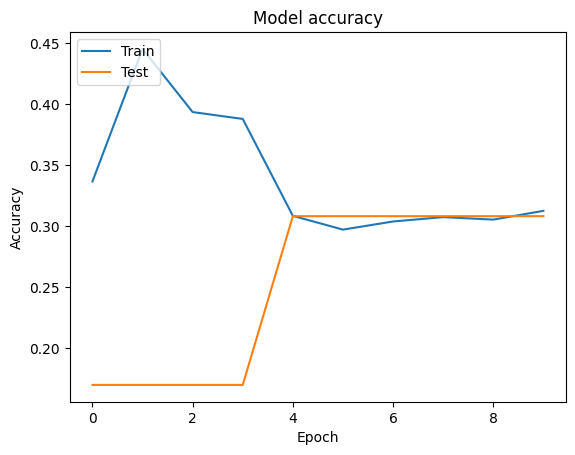

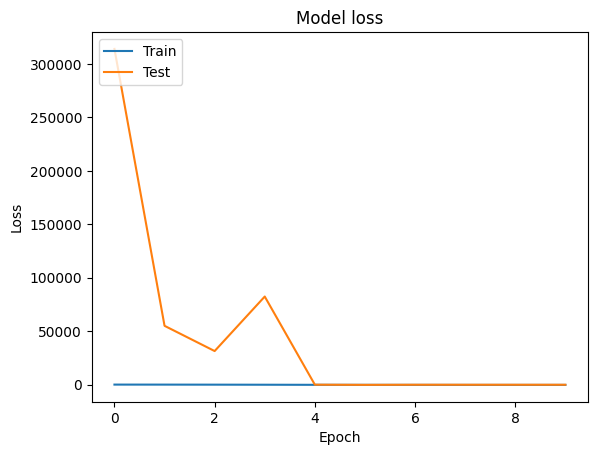

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
from keras.applications.vgg16 import VGG16

In [34]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [35]:
for layer in vgg16.layers:
    layer.trainable = False

In [36]:
folders = glob('/home/rohit/SIH/SIH-website/Cotton Disease/train/*')

In [37]:
x = Flatten()(vgg16.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [39]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [40]:
model.compile( loss='categorical_crossentropy',
               optimizer=optimizers.Adam(learning_rate=0.00075),
               metrics=['accuracy'])

In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
training_set = train_datagen.flow_from_directory('/home/rohit/SIH/SIH-website/Cotton Disease/train',
                                                 target_size = (224, 224),
                                        
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [43]:
test_set = test_datagen.flow_from_directory('/home/rohit/SIH/SIH-website/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [78]:
r = model.fit( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7335 - loss: 0.7538 - val_accuracy: 0.8962 - val_loss: 0.2805
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


2024-08-31 16:11:29.870887: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-08-31 16:11:29.879645: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9069 - loss: 0.2451 - val_accuracy: 0.9434 - val_loss: 0.2117
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20


2024-08-31 16:13:54.964915: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9478 - loss: 0.1635 - val_accuracy: 0.9340 - val_loss: 0.2034
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9568 - loss: 0.1336 - val_accuracy: 0.9245 - val_loss: 0.1897
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20


2024-08-31 16:18:44.750713: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


61/61 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9644 - loss: 0.1083 - val_accuracy: 0.9434 - val_loss: 0.1437
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9682 - loss: 0.0908 - val_accuracy: 0.8774 - val_loss: 0.2971
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9653 - loss: 0.0994 - val_accuracy: 0.9528 - val_loss: 0.1032
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9870 - loss: 0.0602 - val_accuracy: 0.9717 - val_loss: 0.1076
Epoch 16/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/20


2024-08-31 16:28:38.559023: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


61/61 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.9855 - loss: 0.0606 - val_accuracy: 0.9340 - val_loss: 0.1757
Epoch 18/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9784 - loss: 0.0667 - val_accuracy: 0.9245 - val_loss: 0.1623
Epoch 20/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


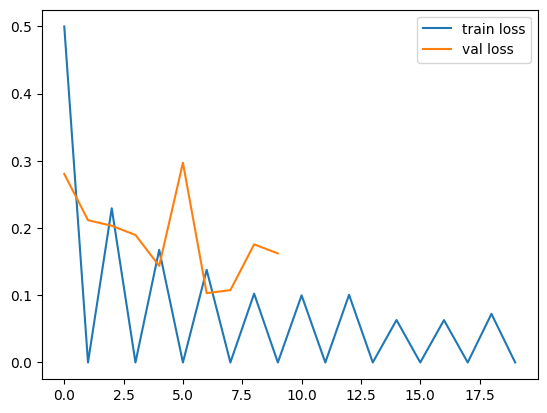

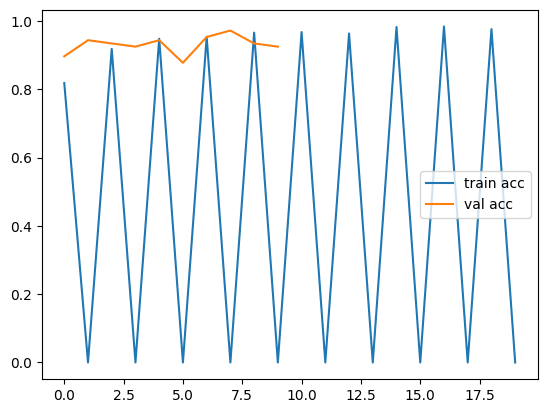

In [79]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


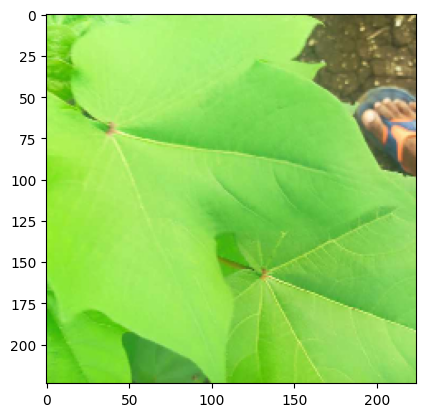

In [80]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/home/rohit/SIH/SIH-website/Cotton Disease/test/fresh cotton leaf/d (40)_iaip - Copy.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [81]:
print(preds.shape)

(1, 4)


In [82]:
preds

array([[1.0367911e-05, 1.3914338e-04, 9.9985051e-01, 4.2315435e-08]],
      dtype=float32)

In [83]:
preds = np.argmax(preds, axis=1)

In [84]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is fresh cotton leaf


In [86]:
# saving to .h5 file
model.save('Resnet_cotton recognizer.h5')
